In [57]:
import numpy as np 
import pandas as pd
from sklearn.impute  import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [58]:
d3=pd.read_csv(r"C:\Users\eyosl\Downloads\Documents\fuel-econ.csv")
d3

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,0,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,0,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,99,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


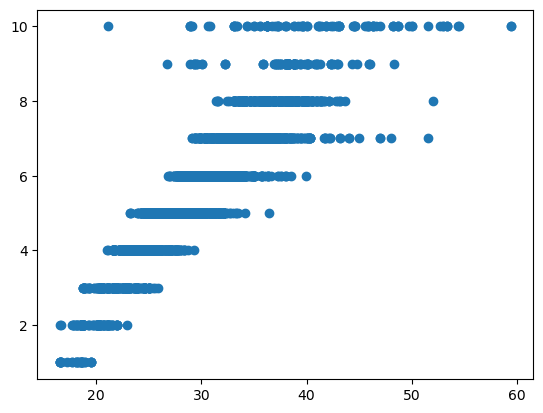

In [59]:
x=d3['highway'].values
y=d3['ghgScore'].values
plt.scatter(x,y)

In [60]:
def check_zero (col):
    return (len(d3[col==0]))

In [61]:
col_list=['cylinders','displ','pv2','pv4','city','UCity','highway','UHighway','comb','co2','feScore','ghgScore']
for col in col_list:
    print(f'there are{check_zero(d3[col])}zeroes in {col}')

there are0zeroes in cylinders
there are0zeroes in displ
there are2806zeroes in pv2
there are1568zeroes in pv4
there are0zeroes in city
there are0zeroes in UCity
there are0zeroes in highway
there are0zeroes in UHighway
there are0zeroes in comb
there are0zeroes in co2
there are0zeroes in feScore
there are0zeroes in ghgScore


In [62]:
un_helpful=['id','make','model','VClass','trans','fuelType','drive']
dd3=d3.drop(un_helpful,axis=1)#ازاى أخلى الناتج يثبت فى الجدول من غير ما احطه فى متغير جديد؟

In [63]:
dd3[col_list]=dd3[col_list].replace(0,np.NAN)
dd3

,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,2013,6,3.8,79.0,NaN,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,2013,4,2.0,94.0,NaN,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,2013,6,3.6,94.0,NaN,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,2013,6,3.6,94.0,NaN,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,2013,4,2.4,NaN,95.0,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018,4,1.8,NaN,NaN,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,2018,4,2.0,NaN,106.0,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,2018,4,2.0,NaN,106.0,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,2018,6,3.4,99.0,NaN,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


In [64]:
dd3.isnull().sum()

year            0
cylinders       0
displ           0
pv2          2806
pv4          1568
city            0
UCity           0
highway         0
UHighway        0
comb            0
co2             0
feScore         0
ghgScore        0
dtype: int64

In [65]:
no_nu= SimpleImputer (strategy='mean')
no_n=ColumnTransformer(transformers=[('num',no_nu,['pv2','pv4'])])
dd3[['pv2','pv4']]=no_n.fit_transform(dd3[['pv2','pv4']])
dd3

,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,2013,6,3.8,79.000000,98.581533,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,2013,4,2.0,94.000000,98.581533,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,2013,6,3.6,94.000000,98.581533,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,2013,6,3.6,94.000000,98.581533,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,2013,4,2.4,82.781834,95.000000,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,2018,4,1.8,82.781834,98.581533,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10
3925,2018,4,2.0,82.781834,106.000000,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9
3926,2018,4,2.0,82.781834,106.000000,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9
3927,2018,6,3.4,99.000000,98.581533,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5


In [67]:
x=dd3.drop(['ghgScore'],axis=1)
y=dd3['ghgScore']

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train


,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore
2330,2016,4,2.5,82.781834,105.000000,22.0000,30.0000,31.0000,47.7000,25.0000,354,6
2638,2017,3,1.2,82.781834,90.000000,32.6414,43.7032,39.7448,58.9226,35.4962,249,8
3189,2017,6,3.0,79.000000,98.581533,19.8767,25.1000,28.0626,39.9000,22.8801,389,5
1922,2015,8,5.0,82.781834,102.000000,18.5788,24.7000,23.2848,30.3000,20.4375,432,5
3595,2018,6,3.5,82.781834,104.000000,28.0777,36.8000,33.0331,47.7998,30.1103,296,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1130,2014,3,1.2,82.781834,86.000000,33.1238,44.4503,40.7940,60.7107,36.1855,243,9
1294,2014,4,2.0,88.000000,98.581533,22.9011,29.3140,32.7919,47.4100,26.4976,335,7
860,2014,8,4.2,81.000000,98.581533,15.8793,19.2000,22.1836,28.9000,18.2078,486,4
3507,2018,6,3.0,82.781834,96.000000,17.3650,21.6857,23.7388,33.2484,19.7514,450,4


In [69]:
y_train

2330    6
2638    8
3189    5
1922    5
3595    7
       ..
1130    9
1294    7
860     4
3507    4
3174    3
Name: ghgScore, Length: 3143, dtype: int64

In [70]:
scalar=StandardScaler()
x_train_sc=scalar.fit_transform(x_train)
x_test_sc=scalar.fit_transform(x_test)
x_train_sc

array([[ 0.2825411 , -0.77509451, -0.33724667, ...,  0.02021862,
        -0.23180539,  0.17960821],
       [ 0.87653887, -1.30839618, -1.33094119, ...,  1.76029106,
        -1.37069558,  1.31658428],
       [ 0.87653887,  0.29150884,  0.04494352, ..., -0.33122091,
         0.14782468, -0.38887982],
       ...,
       [-0.90545445,  1.35811218,  0.9622    , ..., -1.10580032,
         1.19994229, -0.95736785],
       [ 1.47053664,  0.29150884,  0.04494352, ..., -0.84990049,
         0.80946565, -0.95736785],
       [ 0.87653887,  1.35811218,  2.64383687, ..., -1.10054506,
         1.19994229, -1.52585588]])

In [71]:
dd3.to_csv('processed data of task1.csv', index=False)